# Matrix Inversion: Gauss-Jordan vs PLU Decomposition

In [1]:
import numpy as np
import scipy.linalg
import time
import matplotlib.pyplot as plt

In [2]:
def generate_invertible_matrix(n, seed= 3301):
    np.random.seed(seed)
    A = np.random.rand(n, n)
    while np.linalg.matrix_rank(A) < n:
        A = np.random.rand(n, n)
    return A


In [3]:
def gauss_jordan_inverse(A):
    n = A.shape[0]
    AI = np.hstack([A.astype(float), np.eye(n)])
    for i in range(n):
        AI[i] = AI[i] / AI[i, i]
        for j in range(n):
            if i != j:
                AI[j] = AI[j] - AI[i] * AI[j, i]
    return AI[:, n:]


In [4]:
def plu_inverse(A):
    P, L, U = scipy.linalg.lu(A)
    inv_A = scipy.linalg.inv(U) @ scipy.linalg.inv(L) @ P.T
    return inv_A


In [5]:
def compare_methods(n=200):
    A = generate_invertible_matrix(n)

    # Gauss-Jordan
    start_gj = time.time()
    A_inv_gj = gauss_jordan_inverse(A)
    time_gj = time.time() - start_gj
    error_gj = np.linalg.norm(np.eye(n) - A @ A_inv_gj)

    # PLU
    start_plu = time.time()
    A_inv_plu = plu_inverse(A)
    time_plu = time.time() - start_plu
    error_plu = np.linalg.norm(np.eye(n) - A @ A_inv_plu)

    return {
        "Gauss-Jordan": {"time": time_gj, "error": error_gj},
        "PLU": {"time": time_plu, "error": error_plu}
    }


In [6]:
results = compare_methods(n=200)
print(results)

{'Gauss-Jordan': {'time': 0.09048199653625488, 'error': 2.2857706675226116e-10}, 'PLU': {'time': 0.019524097442626953, 'error': 1.0317058057852112e-12}}


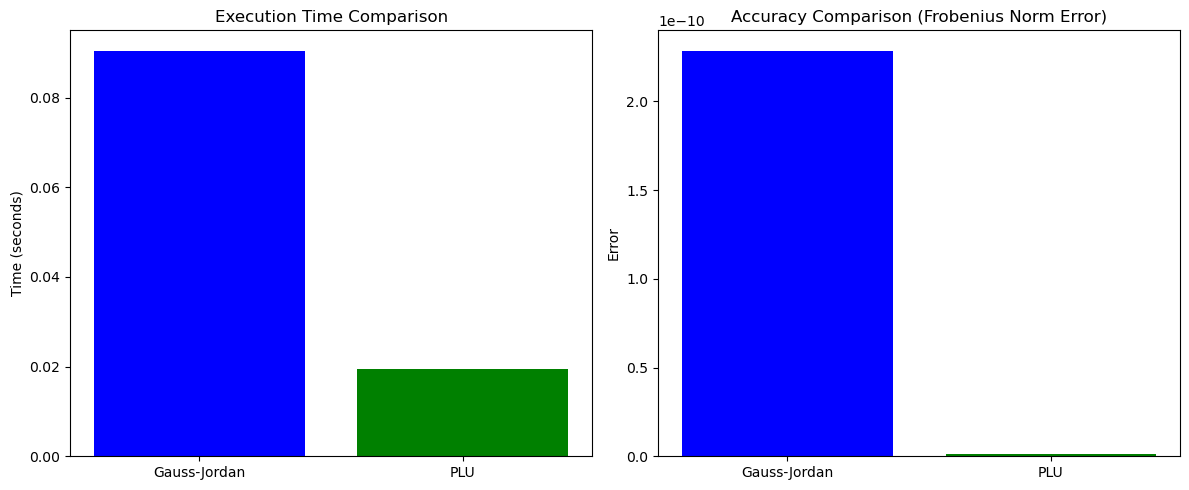

In [7]:
methods = list(results.keys())
times = [results[m]['time'] for m in methods]
errors = [results[m]['error'] for m in methods]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(methods, times, color=['blue', 'green'])
plt.title('Execution Time Comparison')
plt.ylabel('Time (seconds)')

plt.subplot(1, 2, 2)
plt.bar(methods, errors, color=['blue', 'green'])
plt.title('Accuracy Comparison (Frobenius Norm Error)')
plt.ylabel('Error')

plt.tight_layout()
plt.show()